<a href="https://colab.research.google.com/github/LeoVogiatzis/medical_data_analysis/blob/main/iml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  %%capture
!pip install orange3
!pip install eli5
!pip install shap
!pip install pdpbox

In [2]:
from sklearn import datasets,model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ipywidgets import interactive

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving cleaned_cardio_train.csv to cleaned_cardio_train.csv


In [4]:
data = pd.read_csv('/content/cleaned_cardio_train.csv').drop(['Unnamed: 0'], axis = 'columns')

In [5]:
print(data.head, data.columns)
# split data into X and y
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.drop('cardio', axis=1),
                                                        data['cardio'], test_size=0.25)


<bound method NDFrame.head of        age  gender    height    weight  ...  active  cardio        bmi  pulse
0       50       2  5.123964  4.127134  ...       1       0  21.967120   30.0
1       55       1  5.049856  4.442651  ...       1       1  34.927679   50.0
2       51       1  5.105945  4.158883  ...       0       1  23.507805   60.0
3       48       2  5.129899  4.406719  ...       1       1  28.710479   50.0
4       47       1  5.049856  4.025352  ...       0       0  23.011177   40.0
...    ...     ...       ...       ...  ...     ...     ...        ...    ...
63933   53       1  5.147494  4.248495  ...       1       1  23.661439   40.0
63934   57       1  5.105945  4.382027  ...       1       1  29.384757   70.0
63935   52       2  5.209486  4.653960  ...       0       1  31.353579   90.0
63936   61       1  5.093750  4.276666  ...       0       1  27.099251   55.0
63937   56       1  5.135798  4.276666  ...       1       0  24.913495   40.0

[63938 rows x 14 columns]> Index(

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
lin_model = LogisticRegression(solver="liblinear",penalty='l2',max_iter=100,C=100,random_state=0)
#lin_model = LogisticRegression(solver="liblinear",penalty='l1',max_iter=1000,C=10,random_state=0)
lin_model.fit(x_train, y_train)
predicted_train = lin_model.predict(x_train)
predicted_test = lin_model.predict(x_test)
predicted_proba_test = lin_model.predict_proba(x_test)
print("Logistic Regression Model Performance:")
print("Accuracy in Train Set",accuracy_score(y_train, predicted_train))
print("Accuracy in Test Set",accuracy_score(y_test, predicted_test))

Logistic Regression Model Performance:
Accuracy in Train Set 0.7233541175734574
Accuracy in Test Set 0.7239912417891774


In [8]:
target_names= list(data['cardio'].unique())
print(f'target data:{target_names}')
#x_test.to_numpy
df = data.copy()
df.drop('cardio', axis=True, inplace=True)
# data.head()
df.columns
type(x_test)

target data:[0, 1]


numpy.ndarray

the coeficients are:[[ 1.74388175 -0.03935543 -1.21524636  3.08061263  7.62172769  5.97705777
   0.95596158 -0.28284346 -0.15748544 -0.20262051 -0.19239204 -3.31795905
   3.43404618]]
the type is<class 'list'>
Number of features: 13


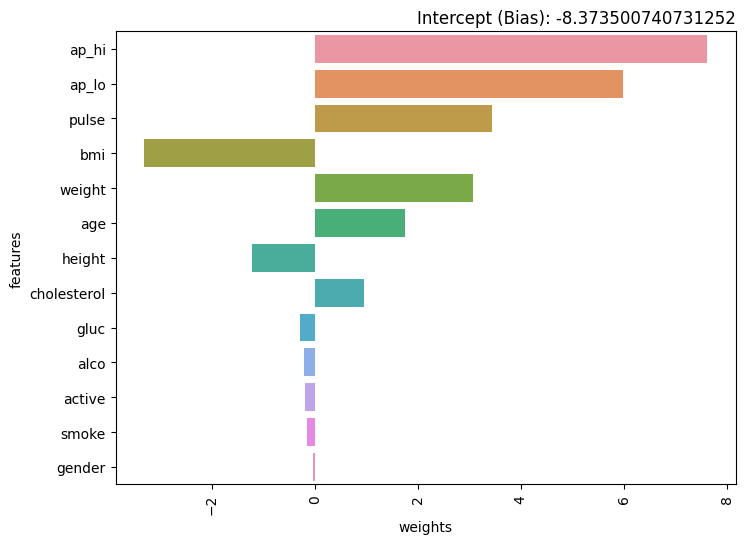

In [9]:

weights = lin_model.coef_
print(f'the coeficients are:{weights}')
feature_names = list(df.columns)
print(f'the type is{type(feature_names)}')
model_weights = pd.DataFrame({ 'features': feature_names,'weights': list(weights[0])})
#model_weights = model_weights.sort_values(by='weights', ascending=False) #Normal sort
model_weights = model_weights.reindex(model_weights['weights'].abs().sort_values(ascending=False).index) #Sort by absolute value
model_weights = model_weights[(model_weights["weights"] != 0)]    
print("Number of features:",len(model_weights.values))
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.title("Intercept (Bias): "+str(lin_model.intercept_[0]),loc='right')
plt.xticks(rotation=90)
plt.show()

In [10]:
from IPython.display import SVG
from IPython.display import display                               
from sklearn.metrics import accuracy_score
# x_test = x_test.to_numpy
def plot_sensor(instance=0):
  random_instance = x_test[instance]
  # print("Original Class:",target_names[y_test[instance]]+", Predicted Class:",target_names[predicted_test[instance]],"with probability of",predicted_proba_test[instance][predicted_test[instance]])
  weights = lin_model.coef_
  summation = sum(weights[0]*random_instance)
  bias = lin_model.intercept_[0]
  res = ""
  if (summation + bias > 0):
    res = " > 0 -> 1"
  else:
    res = " <= 0 -> 0"
  print("Sum(weights*instance): "+str(summation)+" + Intercept (Bias): "+str(bias)+" = "+ str(summation+bias)+ res)
  model_weights = pd.DataFrame({ 'features': list(feature_names),'weights*values': list(weights[0]*random_instance)})
  #model_weights = model_weights.sort_values(by='weights*values', ascending=False)
  model_weights = model_weights.reindex(model_weights['weights*values'].abs().sort_values(ascending=False).index) #Sort by absolute value
  model_weights = model_weights[(model_weights["weights*values"] != 0)]    
  #print("Number of features:",len(model_weights.values))
  plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
  sns.barplot(x="weights*values", y="features", data=model_weights)
  plt.xticks(rotation=90)
  plt.show()
inter=interactive(plot_sensor 
   , instance=(0,9))
display(inter)

interactive(children=(IntSlider(value=0, description='instance', max=9), Output()), _dom_classes=('widget-inte…

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)
print("Simple Decision Tree Performance:")
print("Accuracy in Train Set",accuracy_score(y_train, y_train_pred))
print("Accuracy in Test Set",accuracy_score(y_test, y_pred))

Simple Decision Tree Performance:
Accuracy in Train Set 0.7097157633516151
Accuracy in Test Set 0.7062245855489522


In [12]:
model.feature_importances_

array([0.10581448, 0.        , 0.        , 0.        , 0.89418552,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [13]:

from sklearn.tree import export_graphviz
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive
from graphviz import Source

def plot_tree(depth):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    estimator.fit(x_train, y_train)
    graph = Source(export_graphviz(estimator
          , out_file=None
          , feature_names=feature_names
          , class_names=[str(i) for i in target_names]
          , filled = True))
    print(accuracy_score(y_test, estimator.predict(x_test)))
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , depth=(1,5))
display(inter)

interactive(children=(IntSlider(value=3, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

In [14]:
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report

import eli5
from eli5.sklearn import PermutationImportance
print(target_names)
print("XGBoost Performance on Breast Cancer:")
model = xgboost.XGBClassifier().fit(x_train,y_train)
y_preds = model.predict(x_test)
print(classification_report(y_test,y_preds,data['cardio']))
perm = PermutationImportance(model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


[0, 1]
XGBoost Performance on Breast Cancer:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Weight,Feature
0.1504 ± 0.0055,ap_hi
0.0271 ± 0.0026,cholesterol
0.0235 ± 0.0027,age
0.0021 ± 0.0029,bmi
0.0020 ± 0.0008,ap_lo
0.0013 ± 0.0011,smoke
0.0005 ± 0.0006,alco
0.0004 ± 0.0008,active
0.0003 ± 0.0008,pulse
0.0001 ± 0.0008,height


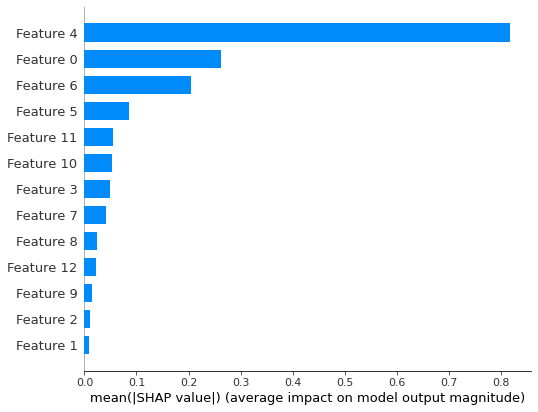

In [15]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

<class 'numpy.ndarray'> 47953 15985


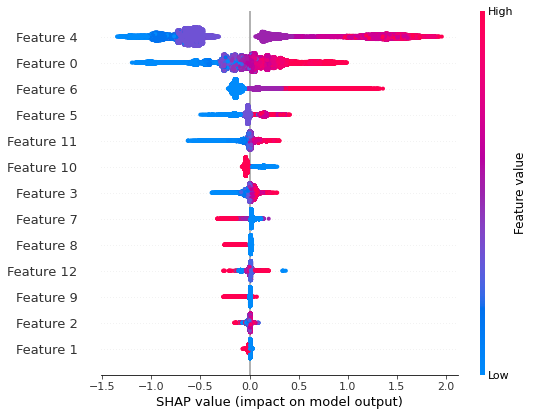

In [16]:

import matplotlib.pyplot as plt
f = plt.figure()
print(type(shap_values), len(shap_values), len(x_test))
shap.summary_plot(shap_values, x_train)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

In [17]:
shap.dependence_plot('height', shap_values, x_train)

ValueError: ignored

In [ ]:
shap.dependence_plot('weight', shap_values, x_train)

In [22]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot():
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [23]:
shap_plot()

NameError: ignored

In [31]:
data.drop('cardio', axis=1, inplace=True)

In [33]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'bmi', 'pulse'],
      dtype='object')

Random Forest Performance on Breast Cancer:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      7835
           1       0.70      0.70      0.70      8150

    accuracy                           0.70     15985
   macro avg       0.70      0.70      0.70     15985
weighted avg       0.70      0.70      0.70     15985



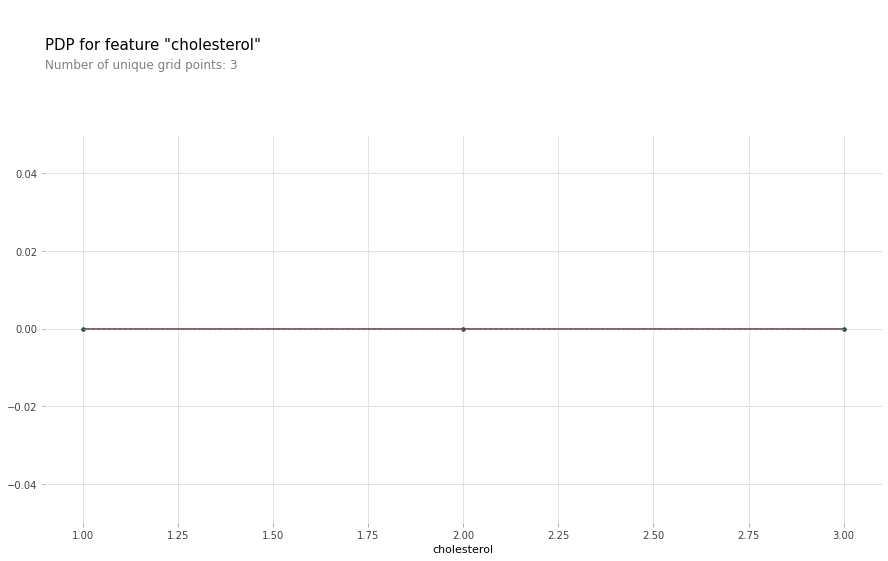

In [37]:
#no data scaling
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Performance on Breast Cancer:")
tree_model = RandomForestClassifier(random_state=0, n_estimators=1000).fit(x_train, y_train)
y_preds = tree_model.predict(x_test)
print(classification_report(y_test,y_preds,target_names=[str(i) for i in target_names]))
# df = pd.DataFrame(breastCancer.data, columns=breastCancer.feature_names)
from pdpbox import pdp, get_dataset, info_plots
# Create the data that we will plot
index = ['Row'+str(i) for i in range(1, len(x_test)+1)]
feature_txt = 'cholesterol' 
#feature_txt = 'radius error' 
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=data, model_features=data.columns, feature=feature_txt )

# plot it
pdp.pdp_plot(pdp_goals, feature_txt)
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
knnmodel = KNeighborsClassifier(n_neighbors=5, weights="distance", metric="minkowski", p=2)
knnmodel = knnmodel.fit(x_train, y_train)
print("Finding Neighbors of Instance...")
test_x = [x_test[0]]
ys = knnmodel.kneighbors(test_x, n_neighbors=3, return_distance=False) #Try for 100!
new_x_train2 = []
new_y_train2 = []
for i in ys[0]:
    print(i)
    if i==25000 or i==25800:
      continue
    new_x_train2.append(x_train[i])
    new_y_train2.append(y_train[i])

Finding Neighbors of Instance...
25613
18159
25800


In [43]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive
from graphviz import Source


print("Decision Tree Explanator")
def plot_tree(depth=1):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    print("Creating Decision Tree for the Instance:")
    estimator.fit(new_x_train2, new_y_train2)
    #print("Decision Tree Predicts and explains for Instance:" + str(estimator.predict(test_x)) + " and Random Forests predicted:" + str(classifier.predict(test_x)))
    fidelityPreds = estimator.predict(new_x_train2)
    #print("Let's see fidelity",accuracy_score(new_y_train2,fidelityPreds))
    
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=feature_names
      , class_names=[str(i) for i in target_names]
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    print("Lets find out the path for this specific instance!")
    for i in estimator.decision_path(test_x):
        print(i)
    return estimator
inter=interactive(plot_tree 
   , depth=(1,5))
display(inter)

Decision Tree Explanator


interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

In [45]:
from IPython.display import SVG
from IPython.display import display                               
from sklearn.metrics import accuracy_score

def plot_sensor(instance=0):
  tar = [str(i) for i in target_names]
  random_instance = x_test[instance]
  print("Original Class:",tar[y_test[instance]]+", Predicted Class:",tar[predicted_test[instance]],"with probability of",predicted_proba_test[instance][predicted_test[instance]])
  weights = lin_model.coef_
  summation = sum(weights[0]*random_instance)
  bias = lin_model.intercept_[0]
  res = ""
  if (summation + bias > 0):
    res = " > 0 -> 1"
  else:
    res = " <= 0 -> 0"
  print("Sum(weights*instance): "+str(summation)+" + Intercept (Bias): "+str(bias)+" = "+ str(summation+bias)+ res)
  model_weights = pd.DataFrame({ 'features': list(feature_names),'weights*values': list(weights[0]*random_instance)})
  #model_weights = model_weights.sort_values(by='weights*values', ascending=False)
  model_weights = model_weights.reindex(model_weights['weights*values'].abs().sort_values(ascending=False).index) #Sort by absolute value
  model_weights = model_weights[(model_weights["weights*values"] != 0)]    
  print("Number of features:",len(model_weights.values))
  plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
  sns.barplot(x="weights*values", y="features", data=model_weights)
  plt.xticks(rotation=90)
  plt.show()
inter=interactive(plot_sensor 
   , instance=(0,9))
display(inter)

interactive(children=(IntSlider(value=0, description='instance', max=9), Output()), _dom_classes=('widget-inte…

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def plot_trees_graph(depth):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    estimator.fit(x_train, y_train)
    weights = estimator.feature_importances_
    model_weights = pd.DataFrame({ 'features': list(feature_names),'weights': list(weights)})
    model_weights = model_weights.sort_values(by='weights', ascending=False)
    plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    sns.barplot(x="weights", y="features", data=model_weights)
    plt.xticks(rotation=90)
    plt.show()
    return estimator
inter=interactive(plot_trees_graph 
   , depth=(1,5))
display(inter)

interactive(children=(IntSlider(value=3, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

In [49]:
import Orange
import Orange.evaluation.scoring
import Orange.classification.rules
import Orange.evaluation

learner = Orange.classification.rules.CN2Learner()
data = Orange.data.Table(x_train, y_train)
print("CN2 Ordered with Entropy Performance:")
def plot_rules(bw, mce, mrl):
    tar = [str(i) for i in target_names]
    learner.rule_finder.quality_evaluator = Orange.classification.rules.EntropyEvaluator()
    learner.rule_finder.search_algorithm.beam_width = bw
    learner.rule_finder.general_validator.min_covered_examples = mce
    learner.rule_finder.general_validator.max_rule_length = mrl
    mymodel = learner.fit_storage(data)
    predicted = mymodel.predict(np.asarray(x_test))
    mypred = []
    for iii in predicted:
        if (iii[0] >= iii[1]):
            mypred.append(0)
        else:
            mypred.append(1)
    print(classification_report(y_test,y_pred,target_names=tar))
    model = learner(data)
    for rule in model.rule_list:
        #rule = str(rule).replace("Class=v1", "malignant").replace("Class=v2", "benign")
        for i in range(len(feature_names)-1,0,-1):
            num = ""
            if i<10:
                num = "0"+str(i)
            else:
                num = str(i)
            print(feature_names[i])
            rule = rule.replace("Feature "+num, "("+ feature_names[i] + ")")
        print(rule)
    print()
    return learner

inter=interactive(plot_rules 
                ,bw = [3,5,8,10]
                ,mce = [7,9,11]
                ,mrl = [2,3,5,10])
display(inter)

CN2 Ordered with Entropy Performance:


Omitting domain in a call to Table(X, Y, metas), is deprecated and will be removed. Call Table.from_numpy(None, X, Y, metas) instead.


interactive(children=(Dropdown(description='bw', options=(3, 5, 8, 10), value=3), Dropdown(description='mce', …